# Importing Modules

In [304]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

In [359]:
import pandas as pd
import numpy as np

churn_data = pd.read_excel("customer_churn_large_dataset.xlsx")
churn_data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


# Data PreProcessing

In [360]:
churn_data.dropna()
churn_data.drop("Name" , axis = 1 , inplace= True)
churn_data.drop("CustomerID" , axis = 1 , inplace= True)

#Vectorizing Genders

churn_data["Gender"] = churn_data["Gender"].apply(lambda g: 1 if g=="Male" else 0)

#Vectorizing Cities

locations = list(churn_data["Location"].unique())
# churn_data["Location"] = churn_data["Location"].apply(lambda x: locations.index(x)+1)
churn_data = pd.get_dummies(churn_data,columns=["Location"], prefix='',prefix_sep='')

churn_data.head(10)


,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Chicago,Houston,Los Angeles,Miami,New York
0,63,1,17,73.36,236,0,False,False,True,False,False
1,62,0,1,48.76,172,0,False,False,False,False,True
2,24,0,5,85.47,460,0,False,False,True,False,False
3,36,0,3,97.94,297,1,False,False,False,True,False
4,46,0,19,58.14,266,0,False,False,False,True,False
5,67,1,15,82.65,456,1,False,False,False,False,True
6,30,0,3,73.79,269,0,True,False,False,False,False
7,67,0,1,97.70,396,1,False,False,False,True,False
8,20,0,10,42.45,150,1,False,False,False,True,False
9,53,0,12,64.49,383,1,False,False,True,False,False


In [361]:
# churn_data["val2money"] = (churn_data["Subscription_Length_Months"] * churn_data["Total_Usage_GB"]) / churn_data["Monthly_Bill"]
# churn_data["val2money"] = (churn_data["Monthly_Bill"] * (churn_data["Location"] + churn_data["Age"]/10) )
churn_data.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Chicago,Houston,Los Angeles,Miami,New York
0,63,1,17,73.36,236,0,False,False,True,False,False
1,62,0,1,48.76,172,0,False,False,False,False,True
2,24,0,5,85.47,460,0,False,False,True,False,False
3,36,0,3,97.94,297,1,False,False,False,True,False
4,46,0,19,58.14,266,0,False,False,False,True,False


In [368]:

churn_data = churn_data.loc[:,["Age","Gender","Los Angeles","Chicago","Houston","Miami","New York","Monthly_Bill","Subscription_Length_Months","Total_Usage_GB","Churn"]]
# churn_data = churn_data.loc[:,["Age","Gender","Location","Monthly_Bill","Subscription_Length_Months","Total_Usage_GB","val2money","Churn"]]

for city in locations:
    churn_data[city] = (churn_data[city] == True).astype(int)

churn_data.head()

,Age,Gender,Los Angeles,Chicago,Houston,Miami,New York,Monthly_Bill,Subscription_Length_Months,Total_Usage_GB,Churn
0,63,1,1,0,0,0,0,73.36,17,236,0
1,62,0,0,0,0,0,1,48.76,1,172,0
2,24,0,1,0,0,0,0,85.47,5,460,0
3,36,0,0,0,0,1,0,97.94,3,297,1
4,46,0,0,0,0,1,0,58.14,19,266,0


# Data Correlation
 

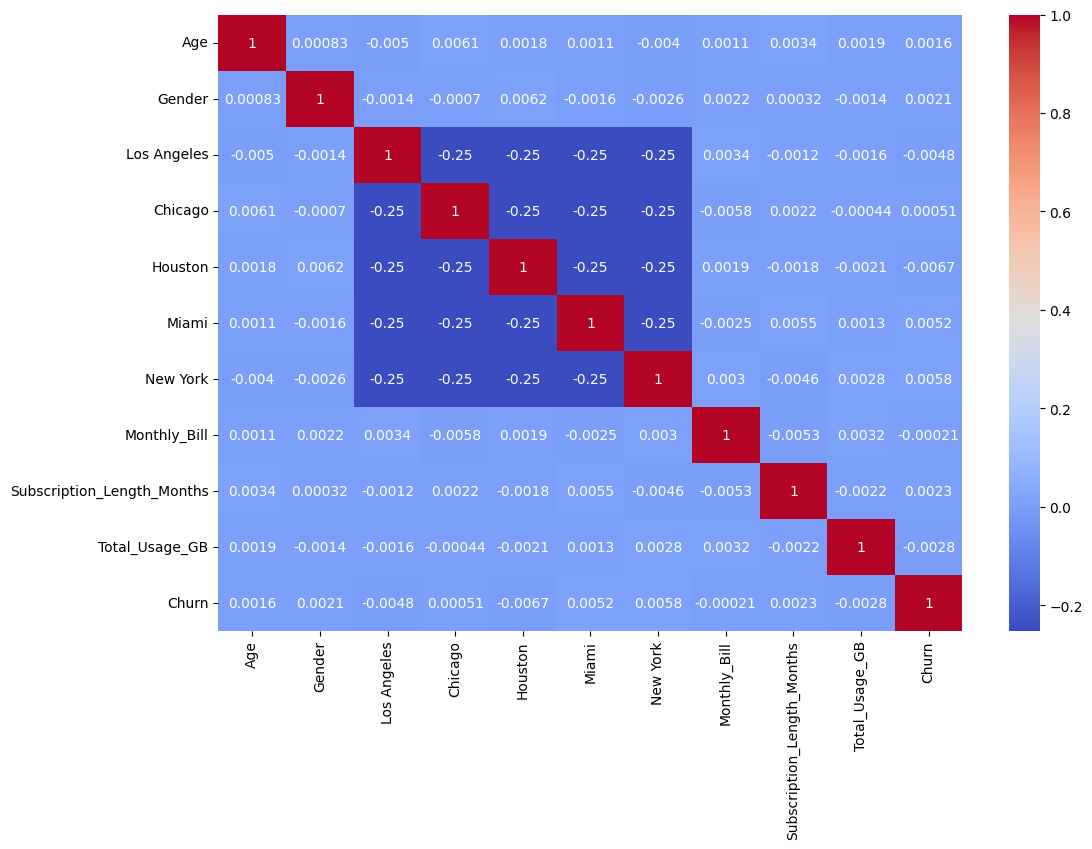

In [369]:
import matplotlib.pyplot as plt
import seaborn as sn

corr = churn_data.corr()
plt.figure(figsize=(12,8))
sn.heatmap(corr,annot=True,cmap="coolwarm")

plt.show()

In [370]:
from pandas.plotting import scatter_matrix

attributes = ["Gender","Age","Total_Usage_GB","Churn"]

scatter_matrix(churn_data[attributes], figsize=(12,8))

array([[<Axes: xlabel='Gender', ylabel='Gender'>,
        <Axes: xlabel='Age', ylabel='Gender'>,
        <Axes: xlabel='Total_Usage_GB', ylabel='Gender'>,
        <Axes: xlabel='Churn', ylabel='Gender'>],
       [<Axes: xlabel='Gender', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Total_Usage_GB', ylabel='Age'>,
        <Axes: xlabel='Churn', ylabel='Age'>],
       [<Axes: xlabel='Gender', ylabel='Total_Usage_GB'>,
        <Axes: xlabel='Age', ylabel='Total_Usage_GB'>,
        <Axes: xlabel='Total_Usage_GB', ylabel='Total_Usage_GB'>,
        <Axes: xlabel='Churn', ylabel='Total_Usage_GB'>],
       [<Axes: xlabel='Gender', ylabel='Churn'>,
        <Axes: xlabel='Age', ylabel='Churn'>,
        <Axes: xlabel='Total_Usage_GB', ylabel='Churn'>,
        <Axes: xlabel='Churn', ylabel='Churn'>]], dtype=object)

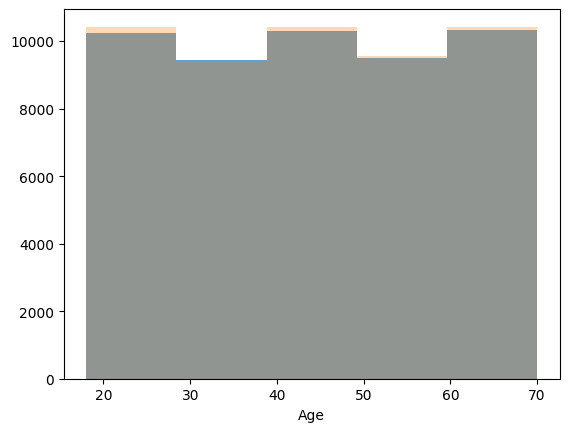

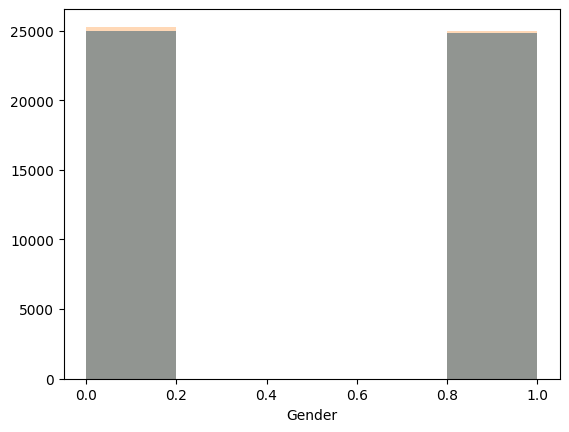

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

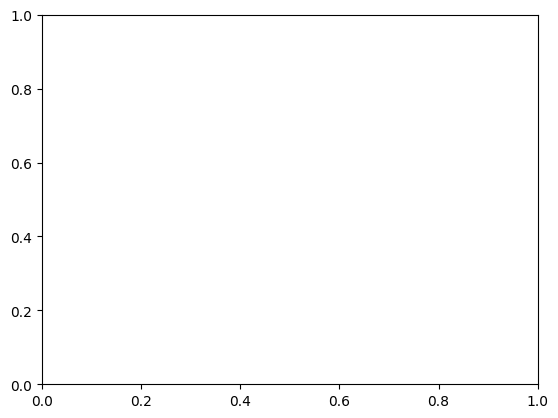

In [ ]:
churn = churn_data[churn_data['Churn'] == 1]
no_churn = churn_data[churn_data['Churn'] == 0]

for col in churn_data:
    # Create histograms for Churn and No Churn
    plt.hist(churn[col], alpha=0.7, label='Churn', bins=5)
    plt.hist(no_churn[col], alpha=0.3, label='No Churn', bins=5)
    plt.xlabel(col)
    plt.show()


# Training Validation And Test Datasets

In [ ]:
churn_df = churn_data.sample(frac = 1)
train , test , valid = np.split(churn_df , [int(0.6*len(churn_df)), int(0.8*len(churn_df))])   

In [ ]:
print(len(train))
train.head()


60000


,Age,Gender,Los Angeles,Chicago,Houston,Miami,New York,Monthly_Bill,Subscription_Length_Months,Total_Usage_GB,Churn
43550,49,1,False,False,False,True,False,51.89,1,141,1
62875,35,0,False,False,False,False,True,32.74,4,418,1
24280,39,0,True,False,False,False,False,36.87,21,180,1
99642,58,0,False,False,False,True,False,52.92,12,167,1
32796,65,0,False,True,False,False,False,40.41,19,324,1


In [ ]:

print(len(test))
test.head()


20000


,Age,Gender,Los Angeles,Chicago,Houston,Miami,New York,Monthly_Bill,Subscription_Length_Months,Total_Usage_GB,Churn
22700,23,0,False,True,False,False,False,63.03,6,331,0
74390,41,1,False,False,False,False,True,55.33,7,425,0
48658,48,0,True,False,False,False,False,55.79,15,352,0
67692,63,1,True,False,False,False,False,96.35,9,474,0
33450,70,1,False,True,False,False,False,57.76,23,322,1


In [366]:
def scale_dataset(df,oversample=False):
    x = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(x)

    # pca = PCA(n_components=n)
    # pca.fit(X)

    # X = pca.transform(X)

    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X , y)

    data = np.hstack((X , np.reshape( y , (-1, 1))))

    return data , X , y

In [331]:
np.unique(train.columns[-1])

array(['Churn'], dtype='<U5')

In [332]:
train , x_train , y_train = scale_dataset(train,oversample=False)
test , x_test , y_test = scale_dataset(test ,oversample= False)
valid , x_valid , y_valid = scale_dataset(valid ,oversample= False)

In [333]:
x_train[2000]

array([-0.32717995,  1.0047111 ,  1.99937521, -0.49781153, -0.50158804,
       -0.50327913, -0.49715982, -0.59447632, -1.514387  , -1.05867325])

# Logistic Regression Model

In [334]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [335]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)


LogisticRegression()

In [336]:
y_pred = lr_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.56      0.53     10023
           1       0.50      0.45      0.47      9977

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



# Support Vector Machine

In [337]:
from sklearn.svm import SVC

In [338]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [358]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.59      0.50      0.54     11718
           1       0.42      0.50      0.46      8282

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.52      0.50      0.51     20000



# Neural Networks

In [340]:
import tensorflow as tf

In [341]:
def plot_history(history):
  fig, (ax1 , ax2) = plt.subplots(1 , 2 , figsize = (10,4))
  ax1.plot( history.history['loss'], label = 'loss')
  ax1.plot( history.history['val_loss'], label = 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary Crossentropy')
  ax1.grid(True)

  ax2.plot( history.history['accuracy'], label = 'accuracy')
  ax2.plot( history.history['val_accuracy'], label = 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax1.grid(True)

  plt.show()

In [342]:
def train_model(num_nodes, drop_prob, epochs, batch_size, lr):

  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu',input_shape = (10,)),
      tf.keras.layers.Dropout(drop_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(drop_prob),
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                                                      metrics= ['accuracy'])

  history = nn_model.fit(
      x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_valid,y_valid)
  )

  return nn_model, history

Epoch 1/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6942 - accuracy: 0.5002 - val_loss: 0.6930 - val_accuracy: 0.5071
Epoch 2/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6935 - accuracy: 0.4968 - val_loss: 0.6931 - val_accuracy: 0.5058
Epoch 3/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6934 - accuracy: 0.5017 - val_loss: 0.6941 - val_accuracy: 0.4942
Epoch 4/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6934 - accuracy: 0.4983 - val_loss: 0.6931 - val_accuracy: 0.5058
Epoch 5/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6934 - accuracy: 0.4980 - val_loss: 0.6931 - val_accuracy: 0.5058
Epoch 6/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6934 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5058
Epoch 7/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6933 - accuracy: 0.5022 - val_loss: 0.6934 - val_ac

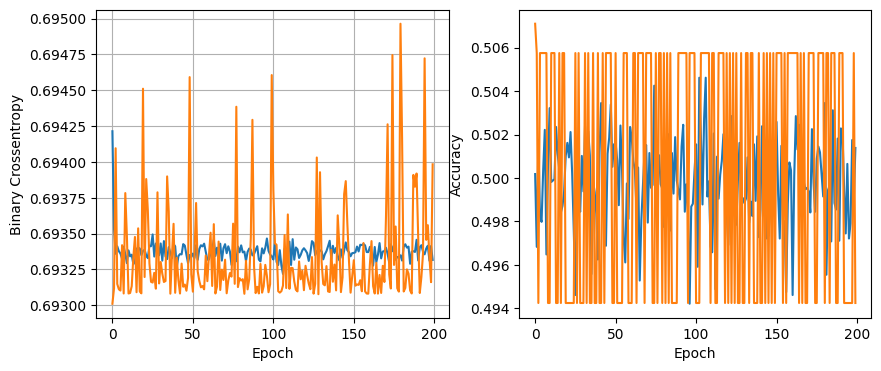

625/625 [==============================] - 0s 590us/step


In [351]:
nn_model,history = train_model(32,0,200,32,0.01)

plot_history(history)
y_pred = nn_model.predict(x_test)



In [352]:
print(y_pred)
y_pred = (y_pred > 0.5).astype(int)
print(y_pred)

print(classification_report(y_pred,y_test))

[[0.5154764]
 [0.5154764]
 [0.5154764]
 ...
 [0.5154764]
 [0.5154764]
 [0.5154764]]
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67     20000

    accuracy                           0.50     20000
   macro avg       0.50      0.25      0.33     20000
weighted avg       1.00      0.50      0.67     20000



C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [357]:
print(y_test)

y_pred = nn_model.predict(x_test)

print(y_pred)

[0 0 0 ... 0 1 1]
625/625 [==============================] - 0s 614us/step
[[0.5154764]
 [0.5154764]
 [0.5154764]
 ...
 [0.5154764]
 [0.5154764]
 [0.5154764]]
